In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from tqdm.auto import tqdm
import pickle

In [22]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load the data

## Train and Validation Split

In [23]:
# run for second time
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_data_lemmatizer.csv"
preprocessed_data_path = folder_path + file_path
df = pd.read_csv(preprocessed_data_path)

In [24]:
# run for second time
df.head()

,id,category,text
0,2009.0642,cs,completely self supervised crowd counting via ...
1,2010.13821,cs,wavelet flow fast training high resolution nor...
2,1904.12782,math,transversally elliptic complex cohomological f...
3,2105.00878,math,malliavin rubel theorem small entire function ...
4,1906.04024,math,odd cycle game connected rule study positional...


In [25]:
# run for second time
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(df["category"])

label = le.transform(df["category"])

df["label"] = label
df.head()

,id,category,text,label
0,2009.0642,cs,completely self supervised crowd counting via ...,3
1,2010.13821,cs,wavelet flow fast training high resolution nor...,3
2,1904.12782,math,transversally elliptic complex cohomological f...,12
3,2105.00878,math,malliavin rubel theorem small entire function ...,12
4,1906.04024,math,odd cycle game connected rule study positional...,12


In [ ]:
category_list = df.category.unique()

In [ ]:
label_list = list(range(0, 23))
le.inverse_transform(label_list)

array(['alg-geom', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'funct-an', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics',
       'q-alg', 'q-bio', 'q-fin', 'quant-ph', 'stat'], dtype=object)

In [ ]:
df.category.nunique()

23

In [ ]:
df.category.value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
q-alg            2
funct-an         1
alg-geom         1
Name: category, dtype: int64

In [ ]:
value_counts_1_category = ["alg-geom", "funct-an"]

In [ ]:
al_geom = df.loc[df["category"] == "alg-geom"]
funct_an = df.loc[df["category"]=="funct-an"]

In [ ]:
al_geom

,id,category,text,label
402494,alg-geom/9411011,alg-geom,classification variety canonical curve section...,0


In [ ]:
type(funct_an)

pandas.core.frame.DataFrame

In [ ]:
df = pd.concat([df, al_geom, funct_an], axis = 0)

In [ ]:
df.category.value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
funct-an         2
alg-geom         2
q-alg            2
Name: category, dtype: int64

In [ ]:
# run for second time
X = df["text"]
y = df["label"]

In [ ]:
# run for second time
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101, stratify=df[["label"]])

In [ ]:
# run for second time
print(f"Train data size : {len(X_train)} \nVal_data_size : {len(X_val)}")

Train data size : 775110 
Val_data_size : 86124


In [ ]:
# run for second time
type(X_train), type(X_val)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
# run for second time
y_train.nunique()

23

In [ ]:
y_val.nunique()

20

## Data Exploration for UNIQUE WORD COUNT AND MAX PADDING LENGTH

In [ ]:
# unique_word_dict can be used to choose the optimal number of vocabs
# length list can be used to choose the padding length for the tokenization process
def findUniqueWord(text_series : pd.core.series.Series):
  """
  Function to find the count of the unique words and length of the articles
  
  Arguments:
    text_series : series of text data
  
  Output:
    unique_word_dict : dictionary with unique word and its count in the text data
    length : list of length of each article
  """
  unique_word_dict = {}
  length = []
  for sentence in tqdm(text_series):
    words = sentence.split()
    length.append(len(words)) 
    for word in words:
      unique_word_dict[word] = unique_word_dict.get(word, 0) + 1
  
  return length, unique_word_dict

In [ ]:
length, unique_word_dict = findUniqueWord(X_train)

  0%|          | 0/775110 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


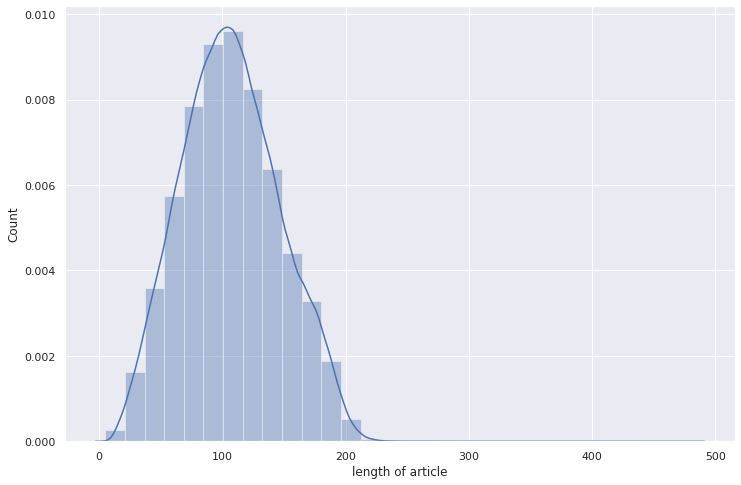

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.distplot(length, bins = 30, hist = True, kde = True)
ax.set(xlabel = "length of article", ylabel = "Count")
plt.show()

In [ ]:
pd.Series(length).describe()

count    775110.000000
mean        106.965778
std          39.876902
min           5.000000
25%          78.000000
50%         105.000000
75%         134.000000
max         483.000000
dtype: float64

In [ ]:
len_gt_250 = [i for i in length if i > 150]
print(len_gt_250)
len(len_gt_250)

[193, 167, 156, 161, 170, 199, 157, 170, 172, 167, 176, 162, 155, 214, 160, 175, 164, 155, 178, 157, 157, 172, 157, 166, 211, 168, 151, 183, 158, 157, 168, 167, 154, 163, 182, 173, 199, 176, 183, 163, 169, 177, 188, 165, 164, 155, 183, 191, 162, 180, 186, 177, 167, 188, 175, 154, 158, 186, 167, 167, 212, 181, 168, 184, 189, 161, 170, 184, 212, 156, 179, 191, 167, 178, 160, 186, 155, 173, 156, 166, 158, 191, 180, 186, 178, 195, 156, 182, 153, 202, 182, 159, 176, 156, 177, 182, 176, 155, 151, 164, 181, 153, 165, 164, 156, 199, 153, 151, 152, 154, 159, 187, 161, 161, 151, 206, 167, 153, 183, 163, 175, 179, 174, 180, 174, 177, 160, 189, 158, 166, 160, 176, 186, 151, 151, 159, 162, 193, 193, 210, 161, 159, 196, 165, 183, 172, 187, 152, 191, 161, 168, 205, 182, 191, 153, 162, 211, 158, 177, 170, 174, 171, 194, 164, 179, 153, 156, 162, 155, 165, 172, 163, 159, 169, 185, 175, 168, 151, 187, 186, 184, 190, 152, 180, 174, 151, 169, 173, 162, 194, 160, 155, 177, 154, 179, 178, 176, 182, 194, 175,

117543

In [ ]:
type(list(unique_word_dict.values()))

list

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


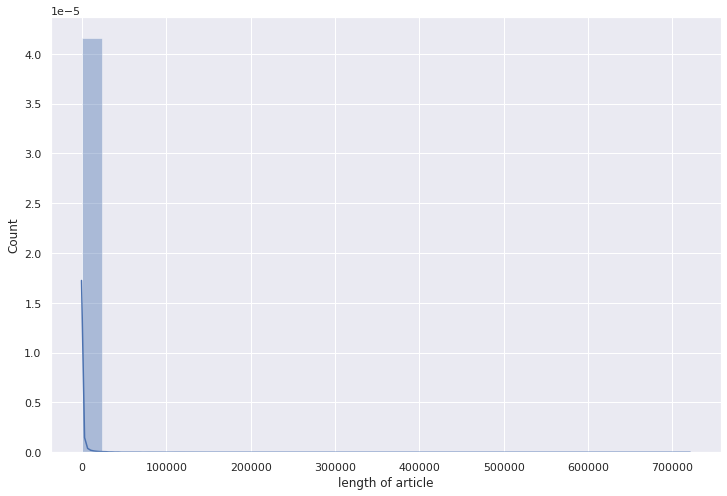

In [ ]:
word_count_list = list(unique_word_dict.values())
ax = sns.distplot(word_count_list, bins = 30, hist = True, kde = True)
ax.set(xlabel = "length of article", ylabel = "Count")
plt.show()

In [ ]:
print(f"Total number of words in the text : {len(word_count_list)}")

Total number of words in the text : 537986


In [ ]:
threshold_word_count = 50

In [ ]:
len([i for i in word_count_list if i < threshold_word_count])

505607

In [ ]:
len([i for i in word_count_list if i > threshold_word_count])

32020

In [ ]:
for word, count in unique_word_dict.items():
  if count > threshold_word_count:
    print(word)

Streaming output truncated to the last 5000 lines.
depleting
2circ
refrigeration
bfv
obstructing
rrn
suffix
vmo
coriolis
pmf
cosy
xh
5548
decorrelate
itinerary
operationalized
micellar
origami
blinding
ctl
arq
676
crustal
jenkins
retrial
retry
lorawan
nge2
nlsp
elln
mathfrakh
qh
qsh
nur
mfr
gso
hansen
unpredicted
enlightened
ife
dob
978
stressor
mce
huggins
lsbgs
chc
capsid
mess
plaque
dagger
reinsurance
cork
aspire
plankton
phytoplankton
taxonomic
algal
decremental
phc
pulsing
buck
radiomic
stss
thermoelectricity
subchannel
broadcasted
permutable
peclet
lightlike
qnec
gapping
cit
fels
assimilated
hei
feii
1917
kuka
trinomials
svdd
lcf
metamodeling
reno
metamodels
mimicker
asf
frac1e
homogenize
2d3d
chic1
groundtruth
semiprime
zassenhaus
cosi
f4
ai2
1cm
2times10
fueling
proteomics
kappag
2k1
fekete
unnaturally
1s0
plasmoid
thermomagnetic
htl
strenuous
naco
sai
mmag
extremity
bradley
reidemeister
microalgae
pond
mall
hyperinterpolation
pneq
backpropagated
kims
balakrishnan
choquard
lobe

## Tokenization

In [ ]:
# run for second time
UNIQUE_WORD_COUNT = 30_000
MAX_PAD_LENGTH = 140

In [ ]:
# run for second time
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = UNIQUE_WORD_COUNT)

In [ ]:
# tokenizer.fit_on_texts(X_train)

In [ ]:
# # saving
# folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
# tokenizer_path = 'tokenizer.pickle'
# with open(folder_path + tokenizer_path, 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# run for second time
# loading
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

## One Hot Encoding for X data

In [ ]:
X_train

155036    hexagonal boron nitride phononic crystal waveg...
314614    correlation bound one dimensional continuous l...
590893    intelligent software web agent gap analysis se...
33451     european historical evidence supernova ad 1054...
829947    stealthy efficient adversarial attack deep rei...
                                ...                        
470261    compositional layering io driven magmatic segr...
364624    one hundred select best predicted sequence num...
685212    descriptive property higher kurepa tree use ge...
838245    stray demagnetizing field homogeneously magnet...
650456    digital social contract foundation egalitarian...
Name: text, Length: 775110, dtype: object

In [ ]:
# run for second time
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(train_padded[0])

[3482, 4608, 4180, 7092, 812, 2328, 3482, 4608, 4180, 721, 3984, 22, 8516, 2312, 2786, 3396, 6890, 2837, 812, 710, 2230, 307, 55, 4441, 1629, 196, 388, 1917, 13, 70, 652, 3969, 4372, 1366, 1540, 23, 1171, 595, 1979, 721, 3984, 7092, 812, 2328, 645, 2876, 4116, 352, 769, 183, 2506, 137, 3200, 115, 874, 759, 7120, 858, 513, 721, 3984, 11256, 2367, 243, 790, 167, 124, 1316, 7092, 812, 2328, 10978, 411, 1567, 2954, 22582, 3513, 115, 874, 1126, 3125, 2175, 1163, 14, 979, 812, 280, 7092, 13697, 3510, 197, 190, 2043, 873, 721, 3984, 7092, 2328, 4313, 4892, 1166, 115, 12626, 721, 3984, 682, 126, 1870, 243, 51, 8689, 256, 24, 1561, 995, 2301, 146, 385, 294, 127, 1540, 721, 3984, 1695, 7092, 253]
[ 3482  4608  4180  7092   812  2328  3482  4608  4180   721  3984    22
  8516  2312  2786  3396  6890  2837   812   710  2230   307    55  4441
  1629   196   388  1917    13    70   652  3969  4372  1366  1540    23
  1171   595  1979   721  3984  7092   812  2328   645  2876  4116   352
   769   183

In [ ]:
# run for second time
val_sequences = tokenizer.texts_to_sequences(X_val)
print(val_sequences[0])
val_padded = pad_sequences(val_sequences, maxlen = MAX_PAD_LENGTH, padding = "post", truncating = "post")
print(val_padded[0])

[478, 381, 397, 63, 144, 203, 70, 4908, 172, 503, 397, 63, 144, 27038, 561, 1639, 2412, 4653, 59, 203, 70, 1, 17, 152, 4908, 172, 1, 23, 7363, 1, 203, 178, 1025, 24895, 82, 91, 4908, 172, 1159, 278, 27038, 478, 195, 1905, 3653, 51, 3385, 488, 25, 288, 23, 123, 779, 254, 142, 27038, 4235, 2048, 269, 628, 95, 1653, 76, 172, 18, 302, 492, 21386, 1478, 45, 946, 478, 55]
[  478   381   397    63   144   203    70  4908   172   503   397    63
   144 27038   561  1639  2412  4653    59   203    70     1    17   152
  4908   172     1    23  7363     1   203   178  1025 24895    82    91
  4908   172  1159   278 27038   478   195  1905  3653    51  3385   488
    25   288    23   123   779   254   142 27038  4235  2048   269   628
    95  1653    76   172    18   302   492 21386  1478    45   946   478
    55     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     

## Over Sampling and Under Sampling of the datasets

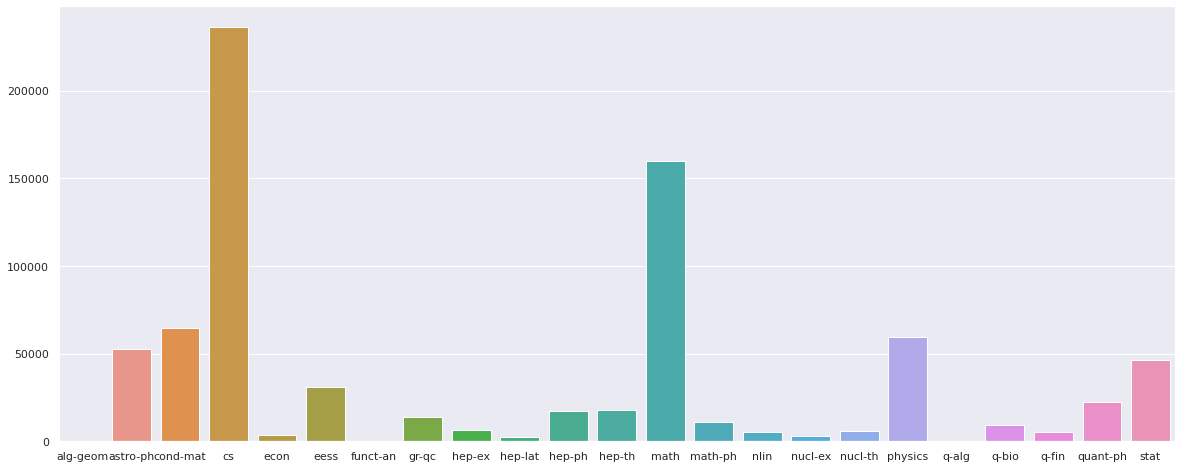

In [ ]:
value_counts_y_train = list(y_train.value_counts().sort_index())
label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)
sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train)

In [ ]:
print(value_counts_y_train)

[2, 52863, 64595, 236253, 3532, 30897, 2, 14031, 6691, 2284, 17286, 17735, 159911, 11014, 5442, 3264, 5996, 59654, 2, 9477, 5348, 22654, 46177]


From graph, it is clear that the data is highly imbalanced.

For balancing the data
1. Oversample the data with count  < 15_000 to 15_000
2. Under sample the data with count  > 50_000 to 50_0000

In [ ]:
count_dict_oversample = {}
threshold = 5_000
for i in range(23):
  if value_counts_y_train[i] < threshold:
    count_dict_oversample[i] = threshold
  else:
    count_dict_oversample[i] = value_counts_y_train[i]
count_dict_oversample

{0: 5000,
 1: 52863,
 2: 64595,
 3: 236253,
 4: 5000,
 5: 30897,
 6: 5000,
 7: 14031,
 8: 6691,
 9: 5000,
 10: 17286,
 11: 17735,
 12: 159911,
 13: 11014,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 59654,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 22654,
 22: 46177}

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ns = RandomOverSampler(count_dict_oversample)
X_train_ns, y_train_ns = ns.fit_resample(train_padded, y_train)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 52863, 2: 64595, 3: 236253, 4: 5000, 5: 30897, 6: 5000, 7: 14031, 8: 6691, 9: 5000, 10: 17286, 11: 17735, 12: 159911, 13: 11014, 14: 5442, 15: 5000, 16: 5996, 17: 59654, 18: 5000, 19: 9477, 20: 5348, 21: 22654, 22: 46177} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
y_train_ns.nunique()

23

In [ ]:
y_train_ns

0         17
1         13
2          3
3          1
4          3
          ..
796019    18
796020    18
796021    18
796022    18
796023    18
Name: label, Length: 796024, dtype: int64

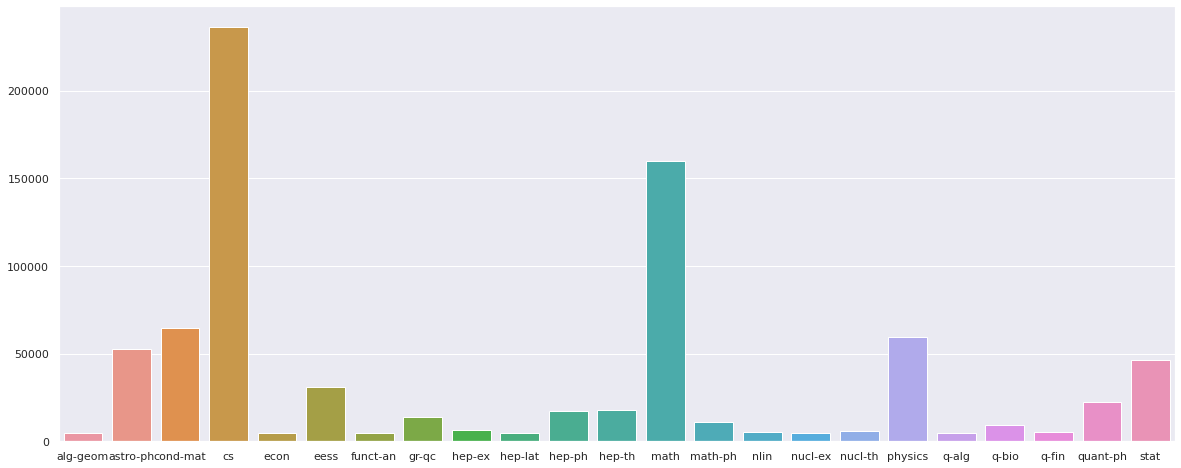

In [ ]:
value_counts_y_train_ns = list(y_train_ns.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_ns)

In [ ]:
print(value_counts_y_train_ns)

[5000, 52863, 64595, 236253, 5000, 30897, 5000, 14031, 6691, 5000, 17286, 17735, 159911, 11014, 5442, 5000, 5996, 59654, 5000, 9477, 5348, 22654, 46177]


Hence, we have oversampled the value with count < 25_000 to 25_000, now we have to undersample the data with count  > 50_000 to 50_000

In [ ]:
count_dict_undersample = {}
threshold = 10_000
for i in range(23):
  if value_counts_y_train_ns[i] > threshold:
    count_dict_undersample[i] = threshold
  else:
    count_dict_undersample[i] = value_counts_y_train_ns[i]
count_dict_undersample

{0: 5000,
 1: 10000,
 2: 10000,
 3: 10000,
 4: 5000,
 5: 10000,
 6: 5000,
 7: 10000,
 8: 6691,
 9: 5000,
 10: 10000,
 11: 10000,
 12: 10000,
 13: 10000,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 10000,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 10000,
 22: 10000}

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(count_dict_undersample)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_ns, y_train_ns)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 10000, 2: 10000, 3: 10000, 4: 5000, 5: 10000, 6: 5000, 7: 10000, 8: 6691, 9: 5000, 10: 10000, 11: 10000, 12: 10000, 13: 10000, 14: 5442, 15: 5000, 16: 5996, 17: 10000, 18: 5000, 19: 9477, 20: 5348, 21: 10000, 22: 10000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


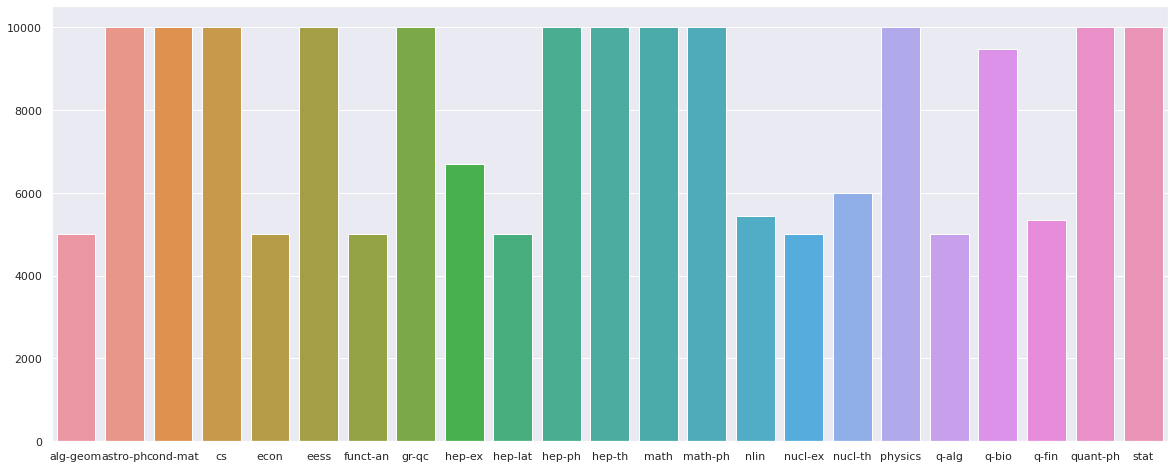

In [ ]:
value_counts_y_train_under = list(y_train_under.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_under)

Still, data seems to be unbalanced

# Sklearn Utils 

In [ ]:
from sklearn.utils import class_weight

In [ ]:
y_train

155036    17
314614    13
590893     3
33451      1
829947     3
          ..
470261     1
364624     5
685212    12
838245     3
650456     3
Name: label, Length: 775110, dtype: int64

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
class_weights = class_weight.compute_class_weight(
    class_weight = "balanced", 
    classes = np.unique(y_train), 
    y = y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 16850.217391304348,
 1: 0.6375051507218413,
 2: 0.521718937729061,
 3: 0.14264553162333896,
 4: 9.541459451474715,
 5: 1.0907348539537398,
 6: 16850.217391304348,
 7: 2.4018555186806854,
 8: 5.036681330534853,
 9: 14.755006472245489,
 10: 1.949579705114468,
 11: 1.9002218653853227,
 12: 0.21074494426655263,
 13: 3.059781621809397,
 14: 6.192656152629309,
 15: 10.32488810741688,
 16: 5.620486121182237,
 17: 0.5649316857647215,
 18: 16850.217391304348,
 19: 3.556023507714329,
 20: 6.301502390166173,
 21: 1.4876152018455326,
 22: 0.7298099656237671}

# One Hot Encoding for y data

In [ ]:
y_train

155036    17
314614    13
590893     3
33451      1
829947     3
          ..
470261     1
364624     5
685212    12
838245     3
650456     3
Name: label, Length: 775110, dtype: int64

In [ ]:
from keras.utils import np_utils
y_train_enc = np_utils.to_categorical(y_train)
N_CLASSES = len(y_train_enc[0])
y_val_enc = np_utils.to_categorical(y_val, num_classes=N_CLASSES)

In [ ]:
N_CLASSES

23

In [ ]:
# Only run for class_weights
X_train_under = train_padded
X_train_under

array([[ 3482,  4608,  4180, ...,     0,     0,     0],
       [  220,    95,    22, ...,     0,     0,     0],
       [ 1641,   748,  1696, ...,     0,     0,     0],
       ...,
       [ 6375,    55,   203, ...,     0,     0,     0],
       [10387,    21, 12158, ...,     0,     0,     0],
       [ 1220,   501,  2707, ..., 11615,   749,  8238]], dtype=int32)

## Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import regularizers
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
N_CLASSES, MAX_PAD_LENGTH

(23, 140)

In [ ]:
def build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH):
  model = Sequential([
    Embedding(UNIQUE_WORD_COUNT, output_dim = 64, input_length = pad_length),
    LSTM(units = 32, dropout = 0.3),
    Dense(128, activation='relu', kernel_initializer= 'glorot_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
  ])

  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizer, 
      metrics=[tf.keras.metrics.CategoricalAccuracy(),
                tfa.metrics.F1Score(num_classes=n_classes, average='macro'),
                tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')])
  model.summary()
  return model

In [ ]:
train_padded.shape

(775110, 140)

In [ ]:
train_padded.shape[1]

140

In [ ]:
model = build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 64)           1920000   
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 23)                2967      
                                                        

In [ ]:
EPOCHS = 5

for the first 5 epochs, batch size was 256

for the second 10 epochs, batch size was 128

For the third 5 epochs

In [ ]:
history = model.fit(X_train_under, y_train_enc, batch_size=128, epochs=EPOCHS, validation_data=(val_padded, y_val_enc), class_weight = class_weights)

Epoch 1/5
6056/6056 [==============================] - 69s 11ms/step - loss: 1.1844 - categorical_accuracy: 0.5523 - f1_score: 0.4062 - fbeta_score: 0.4556 - val_loss: 1.3728 - val_categorical_accuracy: 0.5244 - val_f1_score: 0.3703 - val_fbeta_score: 0.4106
Epoch 2/5
6056/6056 [==============================] - 66s 11ms/step - loss: 1.1019 - categorical_accuracy: 0.5456 - f1_score: 0.4087 - fbeta_score: 0.4586 - val_loss: 1.3152 - val_categorical_accuracy: 0.5408 - val_f1_score: 0.3769 - val_fbeta_score: 0.4178
Epoch 3/5
6056/6056 [==============================] - 70s 12ms/step - loss: 1.0037 - categorical_accuracy: 0.5586 - f1_score: 0.4165 - fbeta_score: 0.4684 - val_loss: 1.5270 - val_categorical_accuracy: 0.4548 - val_f1_score: 0.3367 - val_fbeta_score: 0.3763
Epoch 4/5
6056/6056 [==============================] - 68s 11ms/step - loss: 1.0114 - categorical_accuracy: 0.5500 - f1_score: 0.4112 - fbeta_score: 0.4627 - val_loss: 1.2967 - val_categorical_accuracy: 0.5496 - val_f1_scor

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model_sequential_v2"
model.save(model_path)

# Load model and predict for submission

In [1]:
from keras.models import load_model
import pandas as pd
import pickle
import numpy as np

In [2]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00


In [3]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [4]:
import tensorflow as tf
import tensorflow_addons as tfa

In [5]:
n_classes = 23

In [6]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model_sequential_v2"
loaded_model = load_model(model_path, custom_objects={"categorical_accuracy" : tf.keras.metrics.CategoricalAccuracy(), 
                                                               "f1_score" :  tfa.metrics.F1Score(num_classes=n_classes, average='macro'), 
                                                               "fbeta_score" : tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')
                                                               })

In [7]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_version_2_lemmatizer.csv" 
test_df = pd.read_csv(test_file_path)

In [8]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


### Tokenization of test data

In [9]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [10]:
MAX_PAD_LENGTH = 140

In [11]:
X_test = test_df.text

In [12]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(test_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

In [13]:
y_test_predict = loaded_model.predict(test_padded)

1369/1369 [==============================] - 15s 6ms/step


In [14]:
type(y_test_predict)

numpy.ndarray

In [15]:
y_test_predict.shape

(43785, 23)

In [16]:
y_test_predict[0], y_test_predict[1]

(array([5.5316971e-08, 3.4496293e-04, 5.4581159e-07, 5.5442681e-04,
        9.5650071e-01, 9.6622480e-06, 6.7142889e-07, 1.3683447e-05,
        4.0680920e-06, 1.6239176e-09, 3.6359536e-06, 1.0274101e-06,
        9.1208145e-05, 1.6448088e-06, 4.9264800e-05, 1.4648344e-08,
        1.8330784e-08, 1.9277063e-04, 5.6178531e-05, 1.1553913e-03,
        3.1763114e-02, 5.9075631e-08, 9.2568081e-03], dtype=float32),
 array([1.6573472e-07, 7.0707439e-03, 7.7000016e-01, 2.9068380e-05,
        7.2909401e-08, 3.6576082e-04, 3.6761701e-08, 3.6810450e-03,
        4.1412964e-04, 1.8857080e-03, 6.2835688e-04, 1.4994191e-03,
        9.3621500e-05, 3.4569963e-03, 5.8404617e-03, 1.9888813e-03,
        4.6559800e-03, 1.4242294e-01, 1.5561222e-08, 1.4439746e-04,
        1.6514644e-08, 5.5802938e-02, 1.9066294e-05], dtype=float32))

In [17]:
y_predicted = np.argmax(y_test_predict, axis = 1)

In [18]:
y_predicted

array([ 4,  2, 22, ...,  5,  3,  5])

In [26]:
y_true = le.transform(test_df.category)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      0.76      0.82      3012
           2       0.75      0.68      0.71      3652
           3       0.84      0.51      0.64     13308
           4       0.14      0.54      0.22       199
           5       0.26      0.69      0.38      1734
           7       0.39      0.73      0.51       794
           8       0.33      0.38      0.35       375
           9       0.20      0.69      0.31       127
          10       0.50      0.37      0.43       979
          11       0.46      0.34      0.39       996
          12       0.84      0.60      0.70      9059
          13       0.13      0.45      0.21       608
          14       0.14      0.60      0.22       305
          15       0.24      0.40      0.30       186
          16       0.31      0.46      0.37       342
          17       0.59      0.42      0.49      3390
          19       0.27    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_labels = le.inverse_transform(y_predicted)
print(predicted_labels)

['econ' 'cond-mat' 'stat' ... 'eess' 'cs' 'eess']


In [ ]:
len(predicted_labels)

43785

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
test_df["category"] = predicted_labels

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,econ,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
len(test_df)

43785

In [ ]:
import random

In [ ]:
def viewTextCategory(df, number = 10):
  sample_df = df.sample(number)
  for text, category in zip(sample_df["text"], sample_df["category"]):
    print("========================")
    print(category)
    print(text)

In [ ]:
viewTextCategory(test_df, number = 5)

stat
analysis regression tree fitting algorithm learning rank learning rank area industry level application dominated gradient boosting framework fit tree using least square error principle classification area another tree fitting principle weighted least square error widely used logitboost variant however lack analysis relationship two principle scenario learning rank propose new principle named least objective loss based error enables u analyze issue well several important learning rank model also implement two typical strong system conduct experiment two real world datasets experimental result show proposed method brings moderate improvement least square error principle
math
generalization ross symbol higher k group hypergeometric function ross symbol defined element 1 z1 w k2 fermat curve znwm1 ross showed non torsion computing beilinson regulator paper introduce generalization ross symbol kd1 variety 1 x0n0cdots1 xdndt main result beilinson regulator described hypergeometric funct

In [ ]:
test_df.head()

,id,category,text
0,2107.01095,econ,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submission_df = test_df.drop("text", axis = 1)

In [ ]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/submission_seq_v2.csv"
submission_df.to_csv(submission_path,index = False)

In [ ]:
submission_df.head(10)

,id,category
0,2107.01095,econ
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math
5,2106.13444,physics
6,1812.05778,cs
7,1911.0796,cs
8,1808.07576,stat
9,1902.02865,cs


In [ ]:
test_df.head(10)

,id,category,text
0,2107.01095,econ,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...
5,2106.13444,physics,surface density state semi infinite topologica...
6,1812.05778,cs,trivial yet optimal solution vertex fault tole...
7,1911.0796,cs,alphamu search algorithm game bridge alphamu a...
8,1808.07576,stat,cooperative sgd unified framework design analy...
9,1902.02865,cs,eyeorg platform crowdsourcing web quality expe...


In [ ]:
test_df.iloc[1].text

'crystal structure magnetic property 5d transition metal oxide aoso4 k rb c synthesized 5d1 transition metal oxide aoso4 k rb c solid state reaction performed structure determination magnetic heat capacity measurement found crystallize scheelite k rb quasi scheelite structure c comprising distorted diamond lattice septivalent o d1 ion tetrahedrally coordinated four oxide ion without local inversion symmetry hence antisymmetric spin orbit coupling expected crystal k rb compound wei temperature theta 66 18 k effective magnetic moment mueff 144 145 mubos antiferromagnetic transition temperature tn 369 210 k respectively contrast c compound theta 12 k mueff 08 mubos without magnetic transition 2 k instead exhibiting first order structural transition t 1525 k decline o moment 173 mubos simple d1 spin particularly c likely originate antiparallel orbital moment although spin orbit coupling generally quenched low lying e orbitals'